In [34]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [35]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Wet Chemistry - Show Changes Between Two Observations

1. Parallel coordinate plot
2. Bar chart showing percentage change

This is a simple test of concept. It can be used easily by changing input in the indicated cell, but it not intended to be polished in any way.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option("display.max_columns",25)

**Input in this cell**

In [37]:
siteID = 'WI201'
years = '2'
days = str(int(years)*365)
types = ['Al-w', 'As-w', 'B-w', 'Br-w', 'Ca-w', 'Cs-w', 'Cl-w', 'F-w', 'Fe-w', 'HCO3-w', 'H2S-w', 'K-w', 'Li-w', 'Mg-w', 'Na-w', 'NH3-w', 'NO3-N-w', 'PO4-P-w', 'Rb-w', 'SO4-w', 'SiO2-w']

date1 = '2018-09-12'
date2 = '2018-11-07'

**Get all data**

In [38]:
#setup dataframes
names = ['date', 'obs']
dfall = pd.DataFrame() #for background
dflast = pd.DataFrame() #for last values

#loop through typeIDs
for typeID in types:
    url = 'https://fits.geonet.org.nz/observation?siteID='+siteID+'&typeID='+typeID+'&days='+days
    df = pd.read_csv(url, skiprows=1, parse_dates=['date'], names=names, usecols=[0,1])
    df['typeID'] = typeID
    dfall = dfall.append(df)

In [39]:
dfall

,date,obs,typeID
0,2017-07-26,884.0,Al-w
1,2017-08-18,1093.0,Al-w
2,2018-04-20,1257.0,Al-w
3,2018-07-18,1295.0,Al-w
4,2018-09-12,1676.0,Al-w
5,2018-11-07,2472.0,Al-w
0,2017-07-26,1.4,As-w
1,2017-08-18,1.9,As-w
2,2018-04-20,7.9,As-w
3,2018-07-18,9.1,As-w


In [40]:
#select only the two dates wanted
#construct analyte names and concentrations as a dict, for axis labelling
dstart = dfall[dfall['date']==date1]
tid1 = dstart['typeID'].tolist()
tid1sp = [x + ' ' for x in tid1] # add a space at end
conc1 = dstart['obs'].tolist()
lab1 = dict(zip(tid1sp, conc1))

dend = dfall[dfall['date']==date2]
tid2 = dend['typeID'].tolist()
tid2sp = [' ' + x for x in tid2] # add a space at start
conc2 = dend['obs'].tolist()
lab2 = dict(zip(tid2sp, conc2))

In [41]:
#data for just dates specified
d = dfall[(dfall['date']==date1) | (dfall['date']==date2)]
d.reset_index(inplace=True)
d.drop(['index'], axis=1, inplace=True)
d.head()

,date,obs,typeID
0,2018-09-12,1676.0,Al-w
1,2018-11-07,2472.0,Al-w
2,2018-09-12,9.8,As-w
3,2018-11-07,15.9,As-w
4,2018-09-12,95.0,B-w


In [42]:
data = d.pivot(index='typeID', columns='date', values='obs')
data.reset_index(inplace=True)
data.replace(to_replace=0, value=np.nan, inplace=True)

In [46]:
data

date,typeID,2018-09-12 00:00:00,2018-11-07 00:00:00,perchange
0,Al-w,1676.00,2472.0,47.494033
1,As-w,9.80,15.9,62.244898
2,B-w,95.00,127.0,33.684211
3,Br-w,215.00,262.0,21.860465
4,Ca-w,3363.00,4119.0,22.479929
5,Cl-w,42437.00,60743.0,43.136885
6,F-w,365.00,615.0,68.493151
7,Fe-w,3521.00,4657.0,32.263561
8,H2S-w,0.06,NaN,NaN
9,K-w,1059.00,1384.0,30.689330


## Parallel Coordinate Plot

In [43]:
fig, ax = plt.subplots(figsize=(5,20))
ax.set_yscale('log')
ax.set_ylabel('analyte concentration (mg/L)')

parallel_coordinates(data, 'typeID', ax=ax)
ax.legend().remove()
ax.grid(False)

ax.set_title(siteID+', variation between two analyses')

#add analyte names as label text
#left
for lab,y in lab1.items():
    ax.text(0, y, lab, fontsize=10, horizontalalignment='right', verticalalignment='center')
#right
for lab,y in lab2.items():
    ax.text(1, y, lab, fontsize=10, horizontalalignment='left', verticalalignment='center')

ValueError: Image size of 398x165452 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 360x1440 with 1 Axes>

## Bar Chart

In [44]:
#add percentage change (from first to second observations) to dataframe
obs1 = data.iloc[:,-2]
obs2 = data.iloc[:,-1]

data['perchange'] = (obs2-obs1)/obs1*100
data.head()

date,typeID,2018-09-12 00:00:00,2018-11-07 00:00:00,perchange
0,Al-w,1676.0,2472.0,47.494033
1,As-w,9.8,15.9,62.244898
2,B-w,95.0,127.0,33.684211
3,Br-w,215.0,262.0,21.860465
4,Ca-w,3363.0,4119.0,22.479929


ValueError: time data '2018-09-12' does not match format '%Y-%m-%d %H:%M:%S'

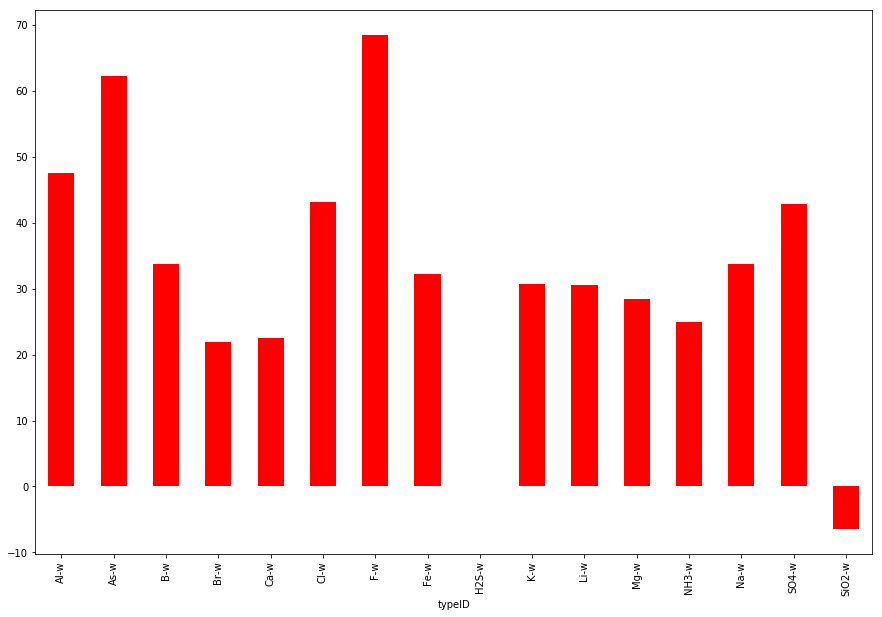

In [45]:
bp = data.plot.bar(x='typeID', y='perchange', figsize=(15,10), color='red', legend=False)

tempdate = dt.datetime.strptime(date1, '%Y-%m-%d %H:%M:%S')
sd1 = dt.datetime.strftime(tempdate,'%Y-%m-%d')
tempdate = dt.datetime.strptime(date2, '%Y-%m-%d %H:%M:%S')
sd2 = dt.datetime.strftime(tempdate,'%Y-%m-%d')

bp.set_title('Percentage change in concentration between two observations, '+sd1+' to '+sd2)
bp.set_ylabel('percentage change')
bp.axhline(color='black')